In [35]:
import tensorflow as tf
import numpy as np
tfk = tf.keras.layers
data = np.random.rand(1000,300).astype(np.float32)
out_data = np.random.rand(1000,1).astype(np.float32)

In [65]:
inputs  = tfk.Input(300)
out = tfk.Dense(100, activation='relu')(inputs)
# out = tfk.Dropout(0.5)(out)
out = tfk.Dense(100, activation='relu')(out)
# out = tfk.Dropout(0.5)(out)

out = tfk.Dense(1, activation='linear')(out)
model = tf.keras.Model(inputs, out)
model.compile('adam', loss='mse')

In [66]:
all_data = tf.data.Dataset.from_tensor_slices((data, out_data))
test_data = all_data.take(100).batch(10)
train_data = all_data.skip(100).batch(10)

model.fit(train_data, validation_data=train_data, epochs=10)



Train for 90 steps, validate for 90 steps
Epoch 1/10
90/90 [==============================] - 1s 7ms/step - loss: 0.1166 - val_loss: 0.0851
Epoch 2/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0884 - val_loss: 0.0839
Epoch 3/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0823 - val_loss: 0.0763
Epoch 4/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0773 - val_loss: 0.0688
Epoch 5/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0738 - val_loss: 0.0645
Epoch 6/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0671 - val_loss: 0.0585
Epoch 7/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0612 - val_loss: 0.0529
Epoch 8/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0530 - val_loss: 0.0493
Epoch 9/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0468 - val_loss: 0.0524
Epoch 10/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0

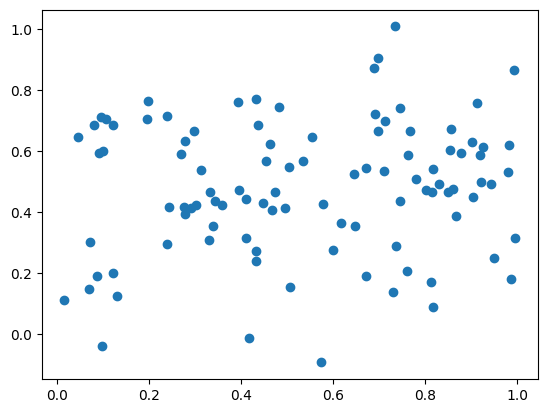

In [67]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use(['default'])
truth = []
for i in test_data:
    truth.append(i[1].numpy())
truth = np.concatenate(truth)
plt.plot(truth, model.predict(test_data).flatten(), 'o')